<a href="https://colab.research.google.com/github/Ufoan/portfolio/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importamos paquetes y leemos el archivo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

df1 = pd.read_csv('Artificial_Crystals_Dataset.csv') #a clasificar
df2 = pd.read_csv('Mineral_Dataset_Supplementary_Info.csv') #entrenamiento

## Análisis exploratorio inicial

In [3]:
df1.shape

(52, 15)

In [4]:
df2.shape

(622, 13)

In [5]:
df1.sample(10)

,Unnamed: 0,Formula,Crystal structure,Hardness (Mohs),allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
29,29,Nd0.02Ca9Gd(VO4)7,hexagonal,4.00,630.20,64.795296,13.998223,4.487783,29.440253,10.879816,2.620009,1.782048,1.011053,0.490174,1.439256
22,22,Nd0.02BaLaLiWO6,cubic,5.50,239.20,29.633992,23.872255,4.295409,56.475997,10.565210,2.528224,1.824132,1.065629,0.465199,2.957484
3,3,GaPO4,trigonal,5.50,78.00,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555
26,26,BaNaB9O15,trigonal,6.00,232.00,25.820980,8.923077,4.615385,19.136778,11.127088,2.760769,1.731923,0.800769,0.482639,0.993115
8,8,Nd0.02GdLa0.16Ca4O(BO3)3,monoclinic,6.42,249.32,22.345960,13.713971,4.365237,29.432344,10.598482,2.525787,1.813894,0.992739,0.487604,1.229151
18,18,Cr0.02CaGdAlO4,tetragonal,6.00,129.48,12.297928,18.444444,4.418803,41.217319,10.378423,2.507578,1.796467,1.052137,0.483923,1.751842
15,15,BaWF8,NaN,3.00,202.00,22.812640,20.200000,6.000000,47.315423,15.245810,3.443000,1.662000,0.836000,0.460005,2.281264
36,36,SrO(B2O3)2,orthorhombic,9.00,114.00,12.029324,9.500000,4.666667,20.236434,11.184467,2.765833,1.734167,0.811667,0.481969,1.002444
30,30,BaCaBO3F,hexagonal,5.00,114.00,7.425576,16.285714,4.571429,36.458070,11.128571,2.604286,1.848571,1.022857,0.477579,1.060797
44,44,PbMoO4,tetragonal,3.00,156.00,21.575328,26.000000,4.833333,61.191020,11.496917,2.953333,1.711667,0.911667,0.472267,3.595888


In [6]:
df2.sample(5)

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
560,567,3.8,760.0,160.284000,26.206897,3.793103,57.460655,9.028634,2.225517,1.902069,1.164138,0.470293,5.527034
471,478,6.8,200.0,17.623984,10.000000,4.800000,20.155772,11.139125,2.706500,1.670500,0.889000,0.497024,0.881199
378,384,2.5,278.0,34.055328,39.714286,5.142857,97.942303,10.960357,2.737143,1.734286,0.987143,0.455333,4.865047
23,23,5.8,298.0,27.560400,14.190476,4.761905,30.872751,11.380005,2.762381,1.711905,0.879048,0.512239,1.312400
29,29,5.8,311.0,32.735400,14.809524,4.714286,32.247201,11.471271,2.772857,1.721429,0.879048,0.511465,1.558829


In [43]:
df2.head(5)

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755


In [7]:
df2.isna().sum()

Unnamed: 0               0
Hardness                 0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [8]:
df2.isnull().sum()

Unnamed: 0               0
Hardness                 0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [9]:
df2.duplicated().sum()

0

### 1. El conjunto de datos contiene 11 variables independientes, ¿considera necesario aplicar algún método de selección de variables en la base de entrenamiento para hacer la predicción de los 51 minerales sintéticos? De ser así, aplique el más conveniente y justifique su respuesta.

In [10]:
df1.columns #a clasificar

Index(['Unnamed: 0', 'Formula', 'Crystal structure', 'Hardness (Mohs)',
       'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average'],
      dtype='object')

In [11]:
df2.columns #var de entrenamiento

Index(['Unnamed: 0', 'Hardness', 'allelectrons_Total', 'density_Total',
       'allelectrons_Average', 'val_e_Average', 'atomicweight_Average',
       'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average',
       'R_cov_element_Average', 'zaratio_Average', 'density_Average'],
      dtype='object')

ambos dataset tienen las mismas columnas con la excepción de "formula" del dataset a utilizar para clasificar. Para ver cuales utilizar para el modelo, inicialmente estudiaremos la matriz de correlaciones, esto para evitar multicolinealidad.

<Axes: >

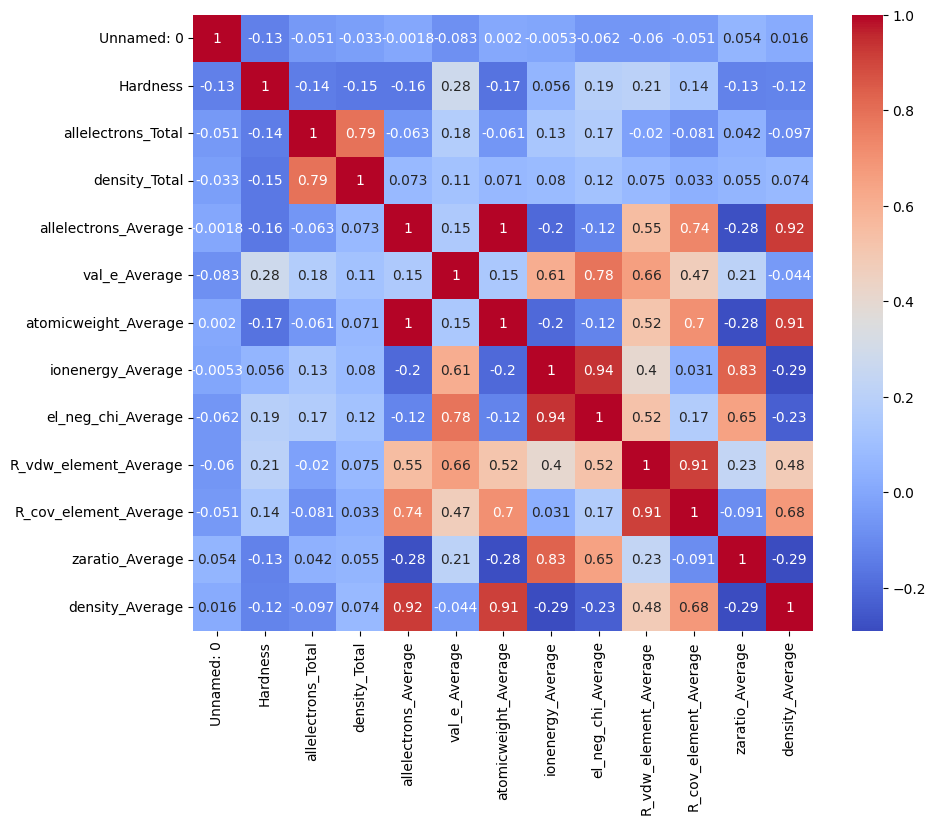

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),cmap='coolwarm', annot=True)


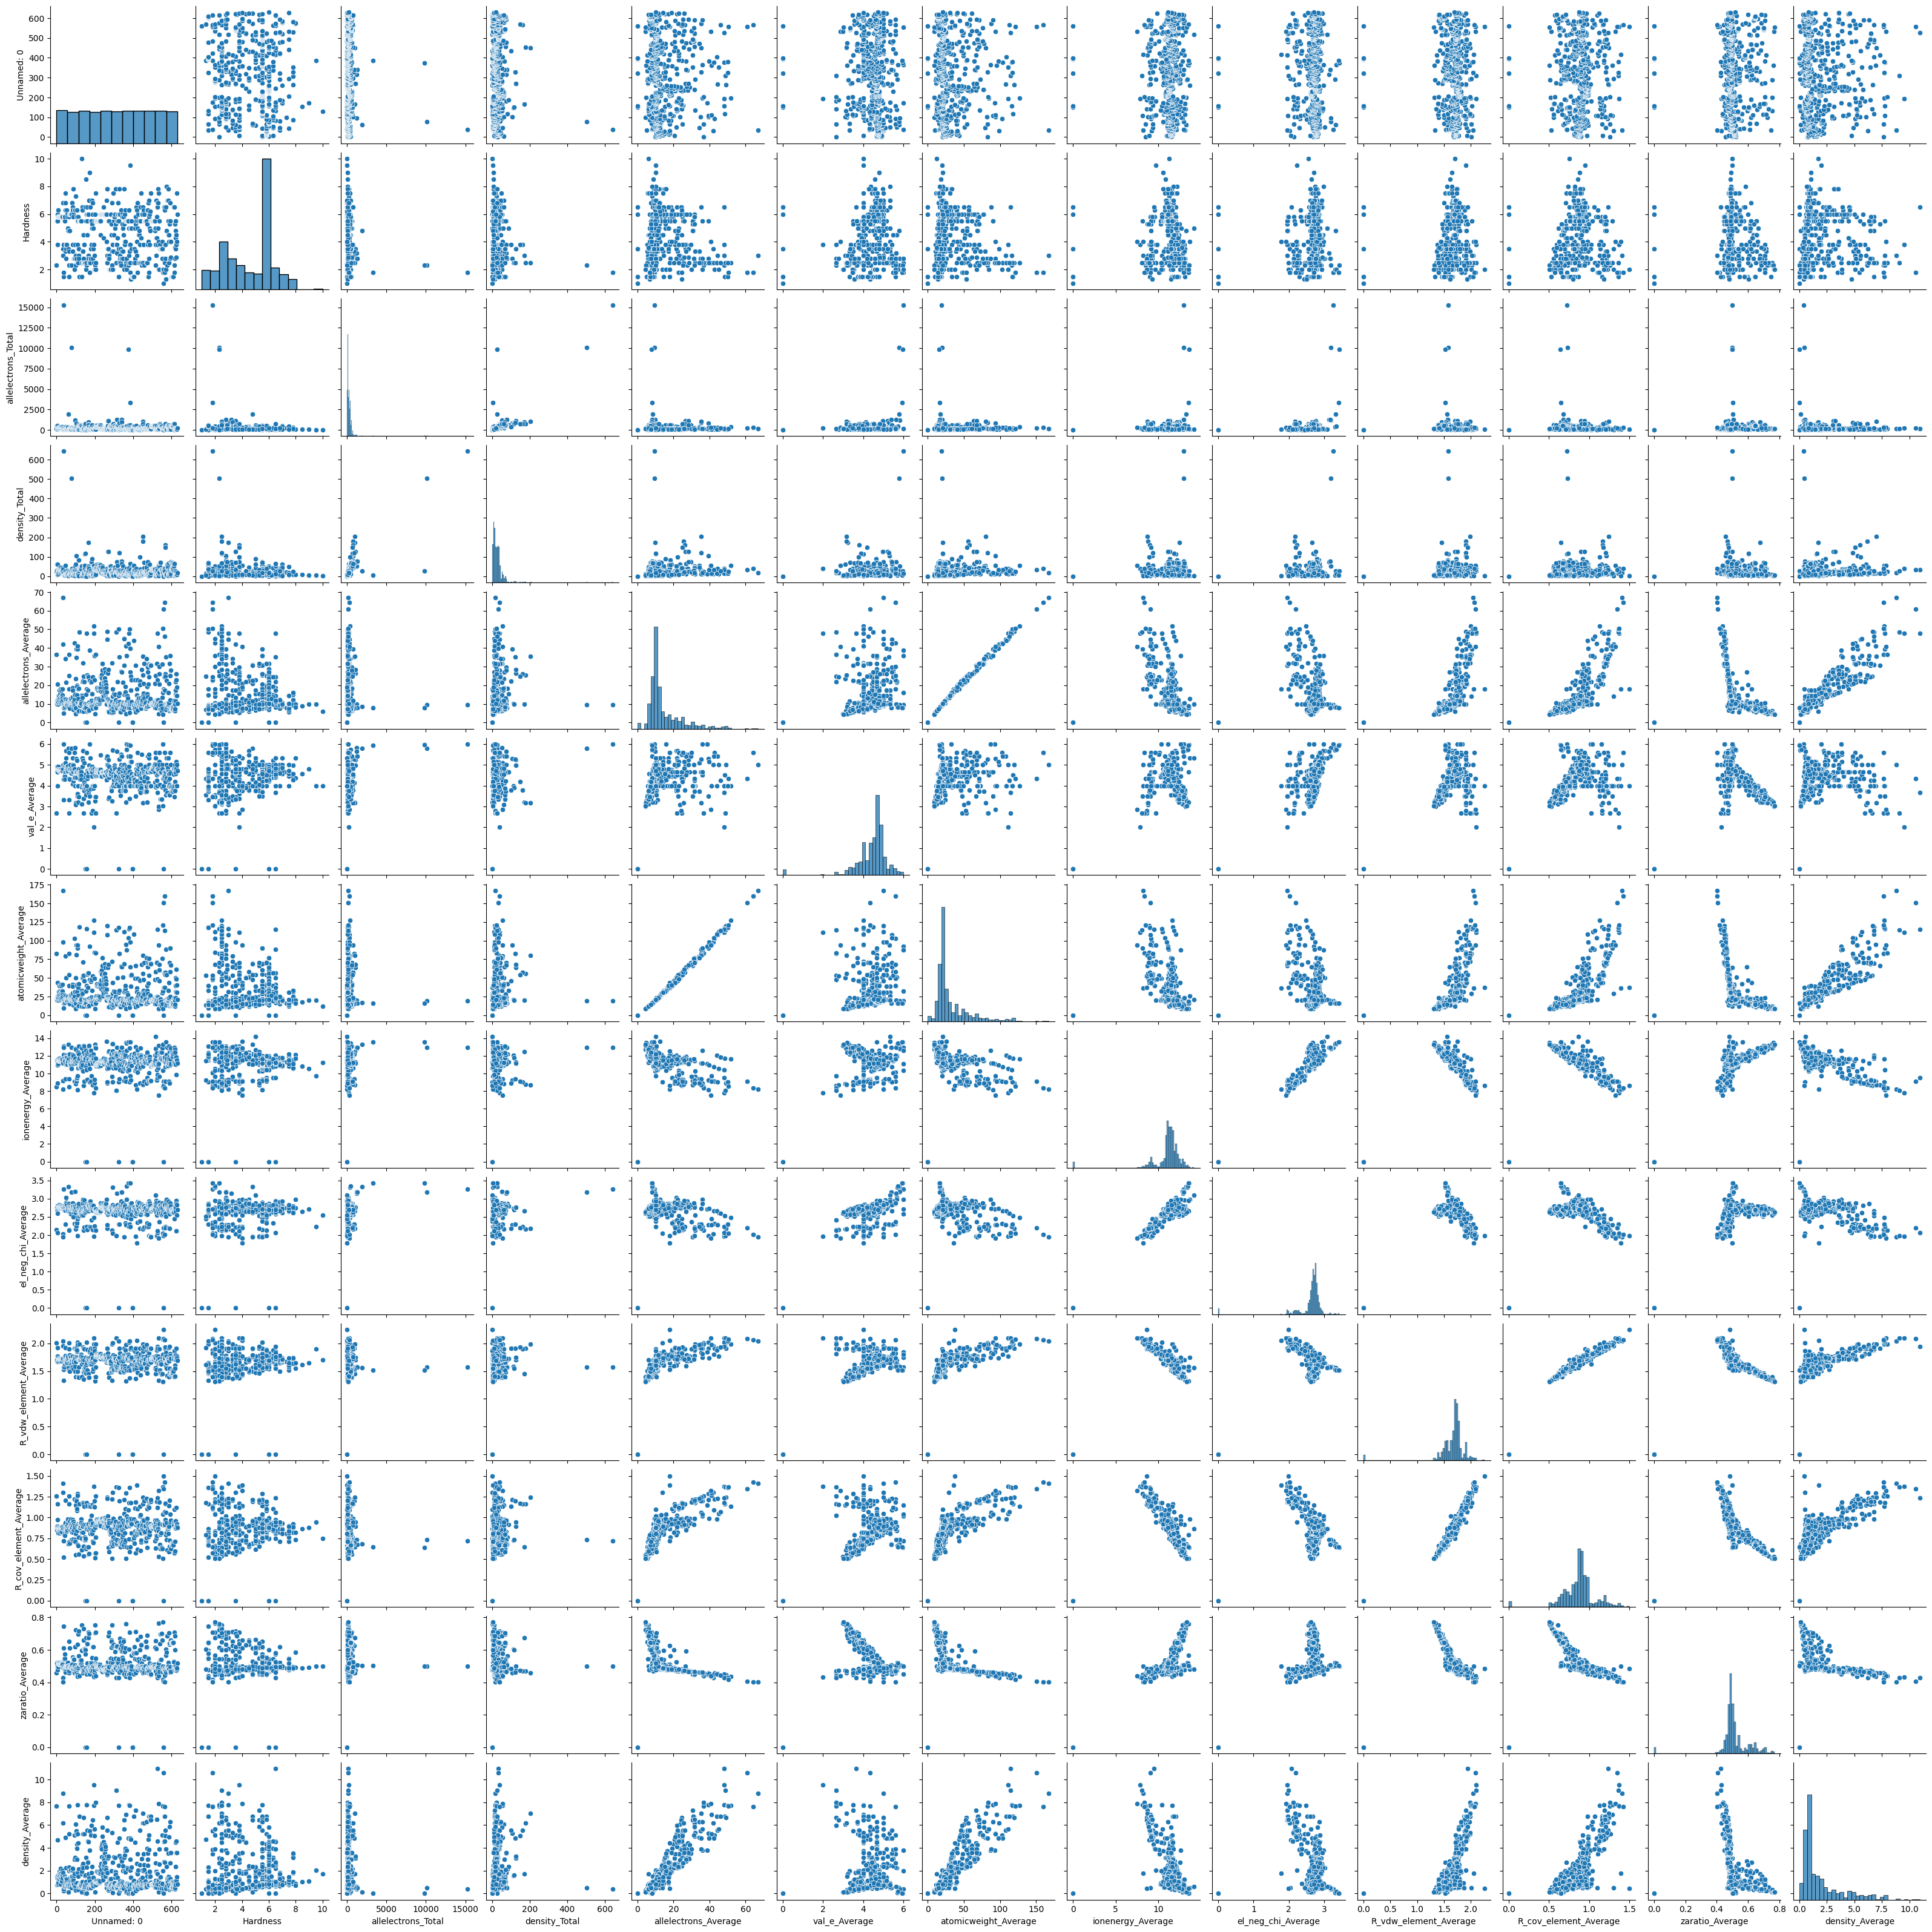

In [24]:
sns.pairplot(df2)

Se puede observar en el heatmap y el pairplot con los scatterplots que *atomicweight_Average* y *allelectrons_Average* poseen una correlación de 1, por lo que para evitar una colinearidad es necesario eliminar una de estas. Otra variable que tiene una alta correlación con las mensionadas es *density_Average*, pero personalmente creo la densidad es importante para el estudio de dureza, por lo que prefiero estudiar la posibilidad de eliminar otras variables. Otros pares de variables con alta correlación son:
- *el_neg_chi_Average* con *ionenergy_Average*, con 0.94.
- *R_vdw_element_Average* con *R_cov_element_Average* con 0.91.

Así las variables que eliminaré son:

In [3]:
variables_a_eliminar = ['atomicweight_Average', 'el_neg_chi_Average','R_vdw_element_Average']

In [4]:
df2_ver2 = df2.drop(columns=variables_a_eliminar,axis=1)

In [15]:
df2_ver2.sample(5)

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,ionenergy_Average,R_cov_element_Average,zaratio_Average,density_Average
477,484,1.8,196.0,30.920000,24.500000,5.500000,10.074300,1.120000,0.469715,3.865000
334,340,3.3,952.0,65.159928,7.677419,4.129032,12.173174,0.696129,0.625608,0.525483
307,312,3.8,348.0,23.290973,7.565217,4.173913,12.286128,0.682609,0.627346,0.506326
259,264,7.8,83.0,12.843328,11.857143,4.571429,10.554000,0.904286,0.488394,1.834761
548,555,2.0,128.0,16.000000,16.000000,6.000000,10.360000,1.040000,0.498970,2.000000


Cabe destacar que existe la posibilidad que otras variables no aporten mucho al modelo, pero esto lo sabremos más adelante, luego de generar el modelo y ver su rendimiento al ir eliminando features.

### 2. Agrupe los 622 minerales de la base de entrenamiento de forma no supervisada para identificar 4 grupos, justifique el método de agrupamiento que utilizó y describa los grupos obtenidos.

Como el número de grupos a generar está fijo, trabajaremos inicialmente con KMeans con K=4.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [17]:
X = df2
scaler = StandardScaler() #definimos el scaler
scaler.fit(X)

StandardScaler()

In [18]:
scaled_df = scaler.transform(X)  #escalamos los datos

In [19]:
scaled_df

array([[-1.73228595e+00, -1.33892325e+00, -2.37960221e-01, ...,
         1.91214846e+00, -6.10897412e-01,  2.95521588e+00],
       [-1.72678986e+00,  5.12666297e-01,  1.09194639e-01, ...,
        -3.47321931e-02,  8.45021607e-02, -6.08325572e-01],
       [-1.72129376e+00,  5.12666297e-01,  1.09194639e-01, ...,
         9.70667699e-02, -1.82807243e-01, -5.88703718e-01],
       ...,
       [ 1.71926145e+00, -3.55266302e-01, -3.22403295e-01, ...,
         2.26715462e-01, -3.73138921e-01,  8.45176300e-01],
       [ 1.72475754e+00,  1.66990976e+00, -2.66107912e-01, ...,
         7.50264923e-02, -2.66874323e-01, -2.32419032e-01],
       [ 1.73025363e+00,  8.01977164e-01, -1.01913046e-01, ...,
         1.48032513e-03,  4.97454383e-02, -5.64961602e-01]])

In [20]:
kmeans_1 = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
kmeans_1.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [21]:
#Para poder graficar estos 4 clusteres en un plano, descompondré los datos con PCA y ocuparé las dos componentes principales
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
pca.fit(scaled_df)
x_pca = pca.transform(scaled_df)

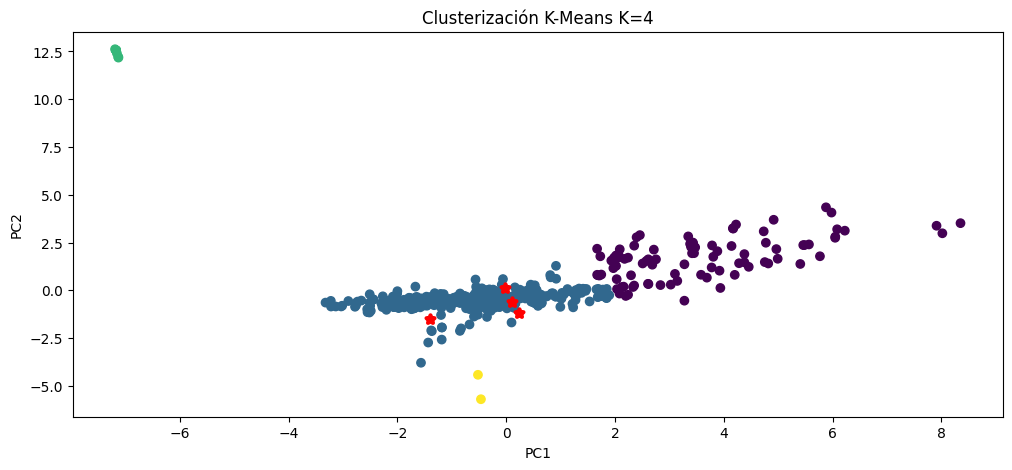

In [23]:
plt.figure(figsize=(12,5))
plt.title('Clusterización K-Means K=4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=kmeans_1.labels_)
plt.scatter(kmeans_1.cluster_centers_[:,0],kmeans_1.cluster_centers_[:,1], c='r', marker='*', lw=3)

In [24]:
#intentamos visualizar en 3D
from mpl_toolkits.mplot3d import Axes3D

In [25]:
pca_2 = PCA(n_components=3)
pca_2.fit(scaled_df)
x_pca_2 = pca_2.transform(scaled_df)

In [27]:
centroides = kmeans_1.cluster_centers_
labels = kmeans_1.labels_

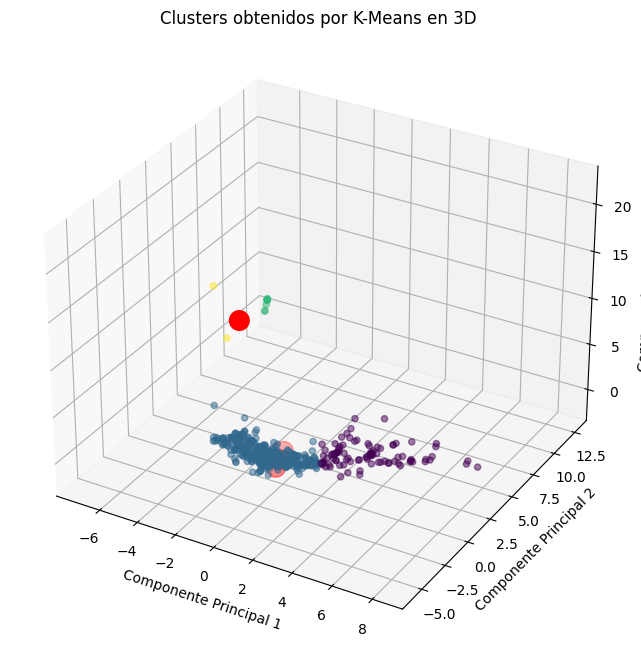

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_2[:, 0],x_pca_2[:, 1], x_pca_2[:, 2], c=labels, cmap='viridis', alpha=0.5)
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker='o', c='red', s=200)  # Centroides en rojo

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

plt.title('Clusters obtenidos por K-Means en 3D')
plt.show()

In [38]:
etiquetas = pd.DataFrame(kmeans_1.labels_)
etiquetas.columns = ['Cluster']
etiquetas.value_counts()

Cluster
1          515
0           95
2           10
3            2
dtype: int64

In [39]:
df2_with_clusters = pd.concat([df2, etiquetas], axis=1)

In [41]:
df2_with_clusters.sample(10)

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Cluster
215,220,5.5,402.0,35.701392,12.181818,4.636364,24.849862,11.087467,2.631515,1.770000,0.937879,0.511275,1.081860,1
351,357,3.8,106.0,19.626828,10.600000,3.800000,22.111243,12.200040,2.795000,1.542000,0.703000,0.589660,1.962683,1
188,191,5.0,77.0,11.295495,9.625000,3.875000,19.705225,12.193413,2.745000,1.542500,0.695000,0.617395,1.411937,1
70,71,6.0,128.0,20.415992,12.800000,4.800000,26.385218,11.381680,2.810000,1.740000,0.860000,0.492820,2.041599,1
14,14,5.8,366.0,41.020400,17.428571,4.761905,40.007103,11.504305,2.793333,1.711429,0.873333,0.510044,1.953352,1
457,464,5.5,232.0,17.246648,10.545455,4.909091,21.211886,11.225123,2.745000,1.709545,0.897273,0.497779,0.783939,1
33,33,3.5,84.0,12.421000,42.000000,5.000000,98.340797,9.198500,2.030000,1.955000,1.300000,0.429675,6.210500,0
0,0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667,0
297,302,5.8,482.0,38.411296,10.711111,4.977778,21.571935,11.132102,2.754667,1.716444,0.893333,0.497275,0.853584,1
478,485,3.8,55.0,9.143996,11.000000,4.800000,22.988947,11.909720,2.884000,1.662000,0.792000,0.490932,1.828799,1


### 3. Utilizando como datos de entrada la selección de variables del punto 1, cree una (1) predicción sobre la escala de dureza y describa el desempeño del modelo que creó.

In [5]:
import xgboost as xgb

In [6]:
#definimos los conjuntos de entrenamiento y test para la validación cruzada
X_train = df2_ver2[['allelectrons_Total','density_Total','allelectrons_Average','val_e_Average','ionenergy_Average','R_cov_element_Average','zaratio_Average','density_Average']]
y_train = df2_ver2['Hardness']
X_test = df1[['allelectrons_Total','density_Total','allelectrons_Average','val_e_Average','ionenergy_Average','R_cov_element_Average','zaratio_Average','density_Average']]
y_test = df1['Hardness (Mohs)']


In [7]:
#verificamos que las magnitudes esten en las mismas dimensiones
X_train.head(3)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,ionenergy_Average,R_cov_element_Average,zaratio_Average,density_Average
0,110.0,23.000000,36.666667,2.666667,8.504133,1.253333,0.456803,7.666667
1,406.0,30.472136,9.902439,4.682927,11.456151,0.868293,0.522909,0.743223
2,406.0,30.472464,10.410256,4.923077,11.541405,0.894359,0.497498,0.781345


In [8]:
X_test.head(3)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,ionenergy_Average,R_cov_element_Average,zaratio_Average,density_Average
0,167.0,23.907992,18.555556,5.000000,11.693844,0.884444,0.47783,2.656444
1,14.0,1.740168,4.666667,1.333333,11.614333,0.680000,0.82599,0.580056
2,102.0,8.511159,4.434783,3.304348,13.176622,0.530870,0.71385,0.370050


Nos piden crear un clasificador, pero la variable objetivo no es una variable categorica o discreta, es continua, por esta razón usaremos el regresor:

In [9]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [12]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'R^2 : {r2}')

Error Cuadrático Medio (MSE): 0.8744284538450686
Error Absoluto Medio (MAE): 0.7357900834083557
R^2 : 0.6158413252659924


Podemos observar aquí que sin modificar los parámetros por defecto de XGB, el modelo tuvo un performance moderado, explicando aproximada un 62% de los datos, lo cuál no es particularmente bueno. Como el modelo que estamos utilizando no se basa en distancias, sino en árboles el escalar datos no necesariamente mejorará el performance. Lo que si podemos intentar es en cambiar algunos parámetros del modelo y ver como varía el performance.

In [14]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'max_depth': [3, 4, 5, 10,20],'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1, 0.01, 0.05, 0.005]}

In [19]:
model2 = xgb.XGBRegressor()
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_result.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [20]:
grid_result.best_score_

-1.418954973564007

In [23]:
y2_pred = grid_result.predict(X_test)

In [27]:
r2_2 = r2_score(y_test,y2_pred)
print(f'El R^2 del nuevo modelo es: {r2_2}')
print(f'El R^2 del modelo anterior es: {r2}')

El R^2 del nuevo modelo es: 0.6196234684364841
El R^2 del modelo anterior es: 0.6158413252659924


Aquí se puede observar una leve mejoría respecto a la milésima en el R^2, pero no es una mejora lo suficientemente grande considerando la complejidad computacional de tener que buscar parámetros dentro de una grilla de parámetros y optimizar (la busqueda en la grilla tomó alrededor de 3 minutos conectado a la TPU de google colab, la creación del modelo sin busqueda fue casi instantáneo utilizando también la TPU).